In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_excel(r'G:\Data analyst by Shashank\Project DATA_SETS\Flight_Data_Train.xlsx')
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
train_df.shape

(10683, 11)

In [4]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
#Find the column where missing value is present.
missing_value = train_df[train_df.isnull().any(1)]

In [6]:
missing_value

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [7]:
train_df.dropna(how='any', inplace=True)
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### EDA

From description we can see that Date_of_Journey is a object data type,\ Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas to_datetime to convert object data type to datetime dtype.

.dt.day method will extract only day of that date\ *.dt.month method will extract only month of that dateM

In [8]:
train_df['Day_date'] = pd.to_datetime(train_df['Date_of_Journey'], format='%d/%m/%Y').dt.day
train_df['Month_date'] = pd.to_datetime(train_df['Date_of_Journey'], format='%d/%m/%Y').dt.month
train_df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_date,Month_date
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3


In [9]:
train_df.drop('Date_of_Journey', axis=1, inplace=True)
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_date,Month_date
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [10]:
train_df['Dep_Time'].value_counts()

18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
        ... 
03:00      1
16:25      1
12:45      1
04:15      1
01:35      1
Name: Dep_Time, Length: 222, dtype: int64

In [11]:
#Converting time into hour and minute of departure time
train_df['Dep_hour'] = pd.to_datetime(train_df['Dep_Time']).dt.hour
train_df['Dep_minute'] = pd.to_datetime(train_df['Dep_Time']).dt.minute
train_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_date,Month_date,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20


In [12]:
train_df.drop('Dep_Time',inplace=True, axis=1)
train_df.head(1)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_date,Month_date,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20


In [13]:
#Converting arrival_time into hour and minutes
train_df['Arrival_hour'] = pd.to_datetime(train_df['Arrival_Time']).dt.hour
train_df['Arrival_minute'] = pd.to_datetime(train_df['Arrival_Time']).dt.minute
train_df.drop('Arrival_Time', axis=1, inplace= True)
train_df.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_date,Month_date,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10


In [14]:
train_df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
29h 30m      1
33h 20m      1
28h 30m      1
30h 25m      1
4h 10m       1
Name: Duration, Length: 368, dtype: int64

In [15]:
#Time taken by plane to reach destination is called duration
#It's the difference between departure time and arrival time

#Assigning and converting duration column into list
duration = list(train_df['Duration'])

for i in range(len(duration)):
    if len(duration[i].split())!=2:  #Check if the durartion contains only hour or minutes
        if 'h' in duration[i]:
            duration[i] = duration[i].strip()+ ' 0m' #Adds 0 minutes
        else:
            duration[i] = '0h '+duration[i]  #Adds 0 hours
duration_hours=[]
duration_mins=[]

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0]))   #Extract hours from duration
    duration_mins.append(int(duration[i].split(sep='m')[0].split()[-1])) #Extract only minutes form duration
    

In [16]:
train_df['duration_hours'] = duration_hours
train_df['duration_mins'] = duration_mins
train_df.drop('Duration',axis=1, inplace=True)
train_df.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_date,Month_date,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50


In [17]:
train_df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [18]:
#This technique is called labelled data technique

train_df['Total_Stops'].replace({'1 stop':1,'non-stop':0,'2 stops':2,'3 stops':3,'4 stops':4}, inplace=True)
train_df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_date,Month_date,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,7,25


In [19]:
train_df['Additional_Info'].value_counts()
#The above column is not required since we are not interested in classes.

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [20]:
train_df['Route'].value_counts()
#This route is almost equal to the number of stops, so not required.

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
CCU → IXA → BLR                   1
BOM → RPR → VTZ → HYD             1
BLR → HBX → BOM → BHO → DEL       1
BOM → JAI → DEL → HYD             1
BLR → HBX → BOM → AMD → DEL       1
Name: Route, Length: 128, dtype: int64

In [21]:
train_df.drop(['Additional_Info','Route'], inplace=True, axis=1)
train_df.head(2)

,Airline,Source,Destination,Total_Stops,Price,Day_date,Month_date,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25


In [22]:
#Now we will perform 1 hot encoder

Airline = pd.get_dummies(train_df[['Airline']])
Airline.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [23]:
Source = pd.get_dummies(train_df[['Source']])
Destination = pd.get_dummies(train_df[['Destination']])
print(Source.head)
print(Destination.head)

<bound method NDFrame.head of        Source_Banglore  Source_Chennai  Source_Delhi  Source_Kolkata  \
0                    1               0             0               0   
1                    0               0             0               1   
2                    0               0             1               0   
3                    0               0             0               1   
4                    1               0             0               0   
...                ...             ...           ...             ...   
10678                0               0             0               1   
10679                0               0             0               1   
10680                1               0             0               0   
10681                1               0             0               0   
10682                0               0             1               0   

       Source_Mumbai  
0                  0  
1                  0  
2                  0  
3            

In [24]:
train_df = pd.concat([train_df,Source,Destination,Airline], axis=1)
train_df.head(2)

,Airline,Source,Destination,Total_Stops,Price,Day_date,Month_date,Dep_hour,Dep_minute,Arrival_hour,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,1,0,0,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,0,0,0,0,0,0,0


In [25]:
train_df.drop(['Airline','Source','Destination'], inplace=True, axis=1)
train_df.head(2)

,Total_Stops,Price,Day_date,Month_date,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,duration_hours,duration_mins,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,3897,24,3,22,20,1,10,2,50,...,0,1,0,0,0,0,0,0,0,0
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,0,0,0,0,0,0,0


In [26]:
x=train_df.drop('Price', axis=1)
y=train_df['Price']
print(x.shape)
print(y.shape)

(10682, 32)
(10682,)


In [27]:
train_df.shape

(10682, 33)

<AxesSubplot:>

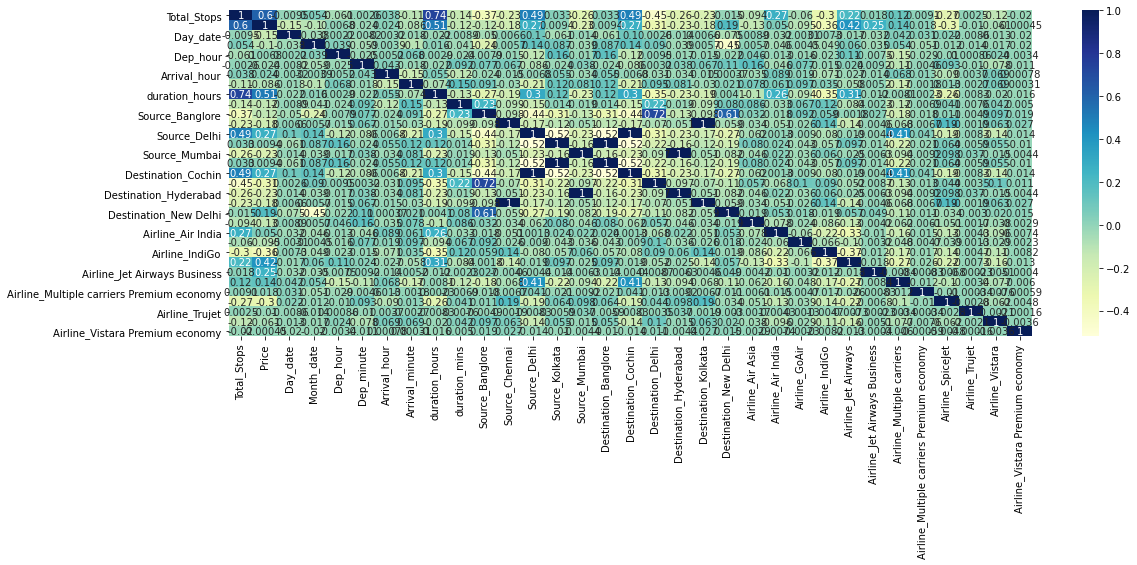

In [28]:
plt.figure(figsize=(18,6))
sns.heatmap(train_df.corr(), annot=True, cmap='YlGnBu')


In [29]:
import sklearn

#Importing feature using ExtraTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

In [30]:
print(selection.feature_importances_)

[2.24511935e-01 1.43905434e-01 5.28818613e-02 2.44812804e-02
 2.11728431e-02 2.73375568e-02 1.88582962e-02 1.29829052e-01
 1.80581623e-02 8.31731164e-03 3.95874708e-04 1.23325330e-02
 2.08866037e-03 7.06127459e-03 1.83569702e-03 1.08236810e-02
 1.19760884e-02 5.63146879e-03 3.71327544e-04 1.72098404e-02
 2.05525625e-03 9.92678035e-03 1.72115270e-03 2.04149320e-02
 1.33293749e-01 6.75358108e-02 1.70822435e-02 8.25779408e-04
 3.00154039e-03 1.00082769e-04 4.87025363e-03 9.22416629e-05]


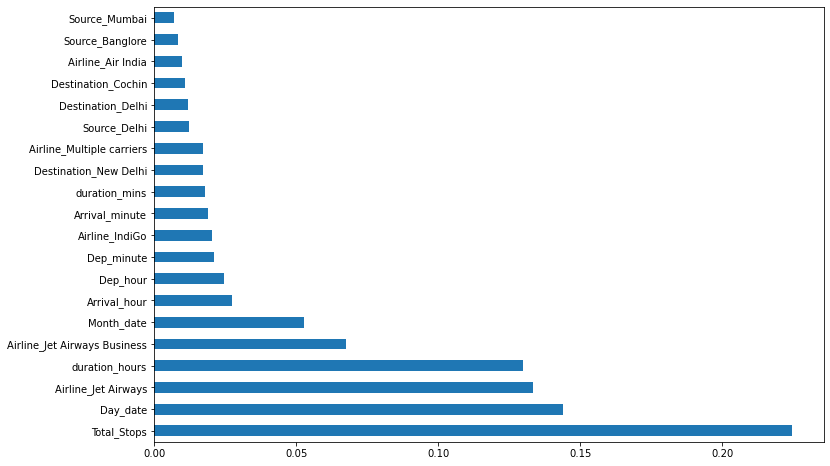

In [31]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Fitting model using Random Forest

1) Split dataset into train_test_split in order to prediction with respect to x_test
2) If needed to scaling of data
ans: The nature of RF is such that convergence and numerical precision issues, which can sometimes trip up the algorithms used in logistic and linear regression, as well as neural networks, aren't so important. Because of this, you don't need to transform variables to a common scale like you might with a NN.
3) Scaling is not done in random forest
4) Import model
5) Fit the data
6) Predict with respect to x_test
7)In regression check RMSE score
8)plot graph

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train,y_train)

RandomForestRegressor()

In [34]:
y_pred = reg_rf.predict(x_test)

In [35]:
reg_rf.score(x_train,y_train)

0.9531772282210916

In [36]:
reg_rf.score(x_test,y_test)

0.7976332154500698

In [37]:
print(x_test.shape)
print(y_pred.shape)

(2137, 32)
(2137,)


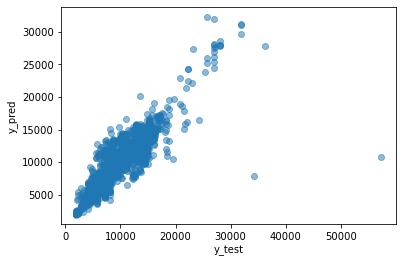

In [38]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [41]:
import sklearn

In [44]:
from sklearn import metrics

In [46]:

print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSEL', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 1172.601546608879
MSE: 4363444.006605107
RMSEL 2088.8858290019366


In [47]:
#RMSE/(max(DV)-min(DV))

2089/(max(y)-min(y))

0.02686713052872558

In [48]:
metrics.r2_score(y_test, y_pred)

0.7976332154500698

Hyperparameter tuning
. Choose follwing method for hyperparameter tuning
. RandomizedSearchCV -> Faster
. GridSearchCV
. Assign hyperparametes in form of dictinory
. Fit the model
. Check best parameters and best score


In [51]:
from sklearn.model_selection import RandomizedSearchCV


In [53]:
#Randomized search CV

#Number of trees in random  forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

#number of features to constider at every split
max_features = ['auto','sqrt']

#maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30, num=6)]

#Minimum number of smaples required to split a node
min_samples_split = [2,5,10,15,100]

#minimum number of samples requireed atr each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [54]:
#Creating the random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf
              }

In [55]:
#Random search of parameters using 5 fold cross validation
#Search across 100 different combination

rf_random = RandomizedSearchCV(estimator=reg_rf, param_distributions=random_grid, scoring='neg_mean_squared_error',
                              n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)

In [56]:

rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [57]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [58]:
prediction = rf_random.predict(x_test)

C:\Users\Manoj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


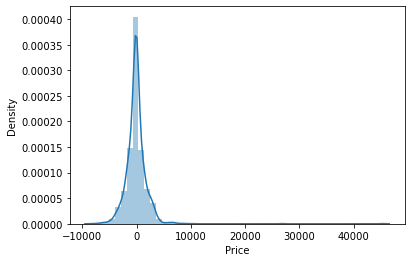

In [60]:
sns.distplot(y_test-prediction)
plt.show()

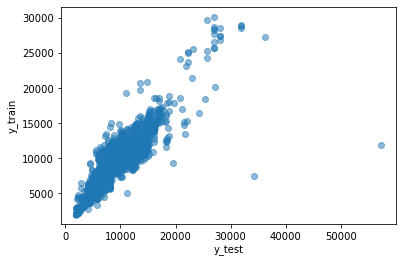

In [61]:
plt.scatter(y_test, prediction, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_train')
plt.show()

In [62]:
reg_rf.score(x_test,y_test)

0.7976332154500698

In [63]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1164.2776751238616
MSE: 4048821.3319456363
RMSE: 2012.1683160077928


In [ ]:
#Save it and reuse it!!!!